Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Dataset**

In [3]:

import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clothing_store_training_test_full.csv')

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

**Checking Dataset**

In [5]:
df.head()

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,...,ln lifetime ave time betw visits,ln product uniformity,sqrt responded,flag returns,flag response rate,flag markdown,sqrt spending months 2 3,sqrt spending months 4 5 6,flag spending months 4 5 6,flag spending months 2 3
0,9.960000e+12,1001,208,2,368.46,0,184.23,11,0.18,0.00,...,4.709530,3.459781,0.000000,F,F,T,0.000000,0.000000,F,F
1,9.960000e+12,1028,6,4,258.00,1,64.50,11,0.26,0.16,...,3.772761,3.487987,1.414214,T,T,T,9.055937,10.954451,T,T
2,9.960000e+12,1056,327,2,77.00,0,38.50,11,1.00,0.00,...,4.228293,4.605170,0.000000,F,F,T,0.000000,0.000000,F,F
3,9.960000e+12,1118,66,8,846.06,1,105.75,11,0.38,0.00,...,3.294354,3.147165,2.449490,F,T,T,10.244023,16.399085,T,T
4,9.960000e+12,1107,49,1,87.44,0,87.44,11,0.20,0.20,...,3.198673,3.350606,0.000000,F,F,T,9.350936,0.000000,F,T


In [6]:
df.shape

(28799, 119)

In [7]:
vars = ['CLUSTYPE', 'WEB', 'AXSPEND', 'AMSPEND','HHKEY',
'ZIP_CODE',
'REC',
'FRE',
'MON',
'CC_CARD',
'AVRG',
'PC_CALC20',
'PSWEATERS',
'PKNIT_TOPS',
'PKNIT_DRES',
'PBLOUSES',
'PJACKETS',
'PCAR_PNTS',
'PCAS_PNTS',
'PSHIRTS',
'PDRESSES',
'PSUITS',
'POUTERWEAR',
'PJEWELRY',
'PFASHION',
'PLEGWEAR',
'sqrt sweaters',
'sqrt knit tops',
'sqrt knit dresses',
'sqrt blouses',
'sqrt jackets',
'sqrt career pants',
'sqrt casual pants',
'sqrt shirts',
'sqrt dresses',
'sqrt suits',
'sqrt outerwear',
'sqrt jewelry',
'sqrt fashion',
'sqrt legwear',
'sqrt collectibles',
'flag sweaters',
'flag knit tops',
'flag knit dresses',
'flag blouses',
'flag jackets',
'flag career pants',
'flag casual pants',
'flag shirts',
'flag dresses',
'flag suits',
'flag outerwear',
'flag jewelry',
'flag fashion',
'flag legwear',
'flag collectibles',
'sqrt spending AM']

In [8]:
vars = ['CLUSTYPE', 'WEB', 'AXSPEND', 'AMSPEND',
#         'HHKEY',
'ZIP_CODE',
'REC',
'FRE',
'MON',
'CC_CARD',
'AVRG',
'PC_CALC20',
'PSWEATERS',
'PKNIT_TOPS',
'PKNIT_DRES',
'PBLOUSES',
'PJACKETS',
'PCAR_PNTS',
'PCAS_PNTS',
'PSHIRTS',
'PDRESSES',
'PSUITS',
'POUTERWEAR',
'PJEWELRY',
'PFASHION',
'PLEGWEAR']

In [9]:
y_cols = 'RESP'
x_cols = vars
# x_cols.remove(y_cols)

In [10]:
dfdtype = pd.DataFrame(df.dtypes)
flag_cols = list(dfdtype[dfdtype.iloc[:,0] == 'object'].index)

In [11]:

df = df.replace(['Y', 'N'], [1, 0])
df = df.replace(['T', 'F'], [1, 0])

In [12]:
df['RESP'].value_counts()

0    24037
1     4762
Name: RESP, dtype: int64

In [13]:
4762/24037

0.19811124516370596

In [14]:
zerodf = df[df[y_cols]== 0].sample(4762)
onedf = df[df[y_cols]== 1]

newdf = pd.concat([zerodf, onedf], axis=0)
newdf[y_cols].value_counts()

0    4762
1    4762
Name: RESP, dtype: int64

In [15]:
df[y_cols].value_counts()

0    24037
1     4762
Name: RESP, dtype: int64

In [16]:

newdf[y_cols].value_counts()

0    4762
1    4762
Name: RESP, dtype: int64

**Statistical Summary of Dataset**

In [17]:

df.describe()

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,...,ln lifetime ave time betw visits,ln product uniformity,sqrt responded,flag returns,flag response rate,flag markdown,sqrt spending months 2 3,sqrt spending months 4 5 6,flag spending months 4 5 6,flag spending months 2 3
count,2.879900e+04,28799.000000,28799.000000,28799.000000,28799.000000,28799.000000,28799.000000,28799.000000,28799.000000,28799.000000,...,28799.000000,28799.000000,28799.000000,28799.000000,28799.000000,28799.000000,28347.000000,28537.000000,28799.000000,28799.000000
mean,9.960000e+12,49023.472343,126.884857,5.039029,473.212463,0.383034,113.588318,12.572624,0.213946,0.027196,...,3.923754,3.390827,0.695779,0.337998,0.459183,0.870725,4.272361,7.674824,0.539706,0.378103
std,0.000000e+00,24084.636341,104.531747,6.349122,659.327414,0.486135,86.980803,2.462172,0.231168,0.068071,...,1.020424,0.724131,0.838848,0.473036,0.498340,0.335510,6.438174,8.681390,0.498430,0.484922
min,9.960000e+12,0.000000,1.000000,1.000000,0.990000,0.000000,0.490000,11.000000,-0.970000,-0.310000,...,-2.407946,-2.995732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.960000e+12,30344.000000,35.000000,1.000000,135.135000,0.000000,60.980000,11.000000,0.000000,0.000000,...,3.218876,2.913980,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.960000e+12,48335.000000,98.000000,3.000000,261.000000,0.000000,92.000000,11.000000,0.160000,0.000000,...,3.951244,3.390473,0.000000,0.000000,0.000000,1.000000,0.000000,6.244998,1.000000,0.000000
75%,9.960000e+12,67047.000000,206.000000,6.000000,567.575000,1.000000,139.500000,16.000000,0.310000,0.030000,...,4.675908,3.912823,1.414214,1.000000,1.000000,1.000000,8.335766,13.453624,1.000000,1.000000
max,9.960000e+12,99687.000000,365.000000,115.000000,24140.330000,1.000000,1919.880000,19.000000,1.000000,1.000000,...,5.897154,5.298317,3.316625,1.000000,1.000000,1.000000,62.898728,87.530623,1.000000,1.000000


In [18]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import neighbors
newdf = newdf.dropna()

In [19]:
# Helper functions to calculate the performance of our models.
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=2)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(str(title.split('\n')[0])+'.png')
    plt.show()
    
def overall_error_rate(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    fn = cnf_matrix[1,0]
    fp = cnf_matrix[0,1]
    tn = cnf_matrix[0,0]
    tp = cnf_matrix[1,1]
    n = len(y_test)
    return (fn+fp)/n

def sensitivity(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    tap = pd.DataFrame(y_test).iloc[:,0].value_counts()[1]
    tp = cnf_matrix[1,1]
    return tp/tap

def false_pos_rate(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    fp = cnf_matrix[0,1]
    tan = pd.DataFrame(y_test).iloc[:,0].value_counts()[0]
    return fp/tan

def specificity(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    tn = cnf_matrix[0,0]
    tan = pd.DataFrame(y_test).iloc[:,0].value_counts()[0]
    return tn/tan

def false_neg_rate(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    fn = cnf_matrix[1,0]
    tap = pd.DataFrame(y_test).iloc[:,0].value_counts()[1]
    return fn/tap

def prop_true_pos(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    try:
        tpp = pd.DataFrame(y_pred).iloc[:,0].value_counts()[1]
    except:
        return 0
    tp = cnf_matrix[1,1]
    return tp/tpp

def prop_true_neg(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    try:
        tn = cnf_matrix[0,0]
        tpn = pd.DataFrame(y_pred).iloc[:,0].value_counts()[0]
    except:
        return 0
    return tn/tpn

def recall(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    try:
        tp = cnf_matrix[1,1]
        fn = cnf_matrix[1,0]
        tpn = pd.DataFrame(y_pred).iloc[:,0].value_counts()[0]
    except:
        return 0
    return tp/(fn+tp)

def precision(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    try:
        tp = cnf_matrix[1,1]
        fp = cnf_matrix[0,1]
        tpn = pd.DataFrame(y_pred).iloc[:,0].value_counts()[0]
    except:
        return 0
    return tp/(fp+tp)

def npv(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    try:
        fn = cnf_matrix[1,0]
        fn = cnf_matrix[1,0]
        tn = cnf_matrix[0,0]
        tpn = pd.DataFrame(y_pred).iloc[:,0].value_counts()[0]
    except:
        return 0
    return tn/(tn+fn)

def f1score(y_pred, y_test):
    prec = precision(y_pred, y_test)
    rec = recall(y_pred, y_test)
    f1 = 2 * ((prec * rec)/(prec + rec))
    return f1

def get_descriptive_data(y_pred, y_test):
    print("Accuracy: %f%%" %(round(accuracy_score(y_test, y_pred)*100,2)))
    print("Overall Error Rate: %f%%" %(round(overall_error_rate(y_pred, y_test)*100,2)))
    print('False Positive Rate: %f%%' %(round(false_pos_rate(y_pred, y_test)*100,2)))
    print('False Negative Rate: %f%%' %(round(false_neg_rate(y_pred, y_test)*100,2)))
    print('Specificity: %f%%' %(round(specificity(y_pred, y_test)*100,2)))
    print("Sensitivity: %f%%" %(round(sensitivity(y_pred, y_test)*100,2)))
    print('Proportion True Positive: %f%%' %(round(prop_true_pos(y_pred, y_test)*100,2)))
    print('Proportion True Negative: %f%%' %(round(prop_true_neg(y_pred, y_test)*100,2)))
    print("recall: %f%%" %(round(recall(y_pred, y_test)*100,2)))
    print("precision: %f%%" %(round(precision(y_pred, y_test)*100,2)))
    print("FDR: %f%%" %(100-round(precision(y_pred, y_test)*100,2)))
    print("NPV: %f%%" %(round(precision(y_pred, y_test)*100,2)))
    print("FOR: %f%%" %(100-round(npv(y_pred, y_test)*100,2)))
    print("F1SCORE: %f%%" %(100-round(f1score(y_pred, y_test)*100,2)))

**Single RANDOM FOREST ON 75 25 TRAIN TEST SPLIT**

Accuracy: 71.200000%
Overall Error Rate: 28.800000%
False Positive Rate: 26.970000%
False Negative Rate: 30.840000%
Specificity: 73.030000%
Sensitivity: 69.160000%
Proportion True Positive: 69.780000%
Proportion True Negative: 72.450000%
recall: 69.160000%
precision: 69.780000%
FDR: 30.220000%
NPV: 69.780000%
FOR: 27.550000%
F1SCORE: 30.530000%


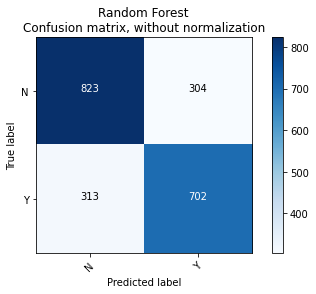

In [20]:
# Random Forrest
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols].values, 
                                                    newdf[y_cols].values, 
                                                    test_size=0.25, 
                                                    random_state=1)
rf = RandomForestClassifier(random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
get_descriptive_data(y_pred, y_test)

y_score = rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_score)
rf_roc_auc = auc(rf_fpr, rf_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest\nConfusion matrix, without normalization')

**Single RANDOM FOREST ON 70 30 TRAIN TEST SPLIT**

Accuracy: 70.390000%
Overall Error Rate: 29.610000%
False Positive Rate: 28.620000%
False Negative Rate: 30.680000%
Specificity: 71.380000%
Sensitivity: 69.320000%
Proportion True Positive: 69.040000%
Proportion True Negative: 71.640000%
recall: 69.320000%
precision: 69.040000%
FDR: 30.960000%
NPV: 69.040000%
FOR: 28.360000%
F1SCORE: 30.820000%


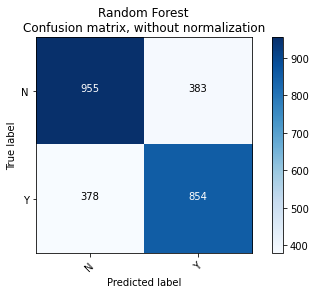

In [21]:
# Random Forrest
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols].values, 
                                                    newdf[y_cols].values, 
                                                    test_size=0.3, 
                                                    random_state=1)
rf = RandomForestClassifier(random_state=1, n_jobs=-1)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
get_descriptive_data(y_pred, y_test)

y_score = rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_score)
rf_roc_auc = auc(rf_fpr, rf_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest\nConfusion matrix, without normalization')

**Single RANDOM FOREST ON 80 20 TRAIN TEST SPLIT**

Accuracy: 70.710000%
Overall Error Rate: 29.290000%
False Positive Rate: 28.360000%
False Negative Rate: 30.310000%
Specificity: 71.640000%
Sensitivity: 69.690000%
Proportion True Positive: 69.020000%
Proportion True Negative: 72.280000%
recall: 69.690000%
precision: 69.020000%
FDR: 30.980000%
NPV: 69.020000%
FOR: 27.720000%
F1SCORE: 30.650000%


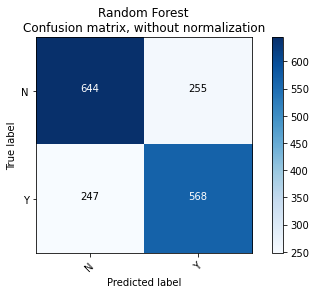

In [22]:
# Random Forrest
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols].values, 
                                                    newdf[y_cols].values, 
                                                    test_size=0.20, 
                                                    random_state=1)
rf = RandomForestClassifier(random_state=1, n_jobs=-1)
np.random.seed(1234)
                                    
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
get_descriptive_data(y_pred, y_test)

y_score = rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_score)
rf_roc_auc = auc(rf_fpr, rf_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest\nConfusion matrix, without normalization')

**Single Logistic Regression 70 30 train test**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 69.940000%
Overall Error Rate: 30.060000%
False Positive Rate: 25.700000%
False Negative Rate: 34.890000%
Specificity: 74.300000%
Sensitivity: 65.110000%
Proportion True Positive: 69.560000%
Proportion True Negative: 70.240000%
recall: 65.110000%
precision: 69.560000%
FDR: 30.440000%
NPV: 69.560000%
FOR: 29.760000%
F1SCORE: 32.740000%


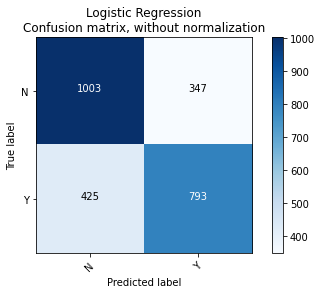

In [ ]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.30, random_state=42)
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
get_descriptive_data(y_pred, y_test)

y_score = lr.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_score)
lr_roc_auc = auc(lr_fpr, lr_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression\nConfusion matrix, without normalization')

**Single Logistic Regression 75 25 train test**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 70.820000%
Overall Error Rate: 29.180000%
False Positive Rate: 22.970000%
False Negative Rate: 35.970000%
Specificity: 77.030000%
Sensitivity: 64.030000%
Proportion True Positive: 71.820000%
Proportion True Negative: 70.080000%
recall: 64.030000%
precision: 71.820000%
FDR: 28.180000%
NPV: 71.820000%
FOR: 29.920000%
F1SCORE: 32.300000%


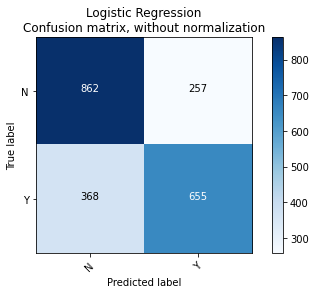

In [23]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.25, random_state=42)
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
get_descriptive_data(y_pred, y_test)

y_score = lr.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_score)
lr_roc_auc = auc(lr_fpr, lr_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression\nConfusion matrix, without normalization')

**Single SUPPORT VECTOR MACHINE 75 25 train test**

Accuracy: 69.580000%
Overall Error Rate: 30.420000%
False Positive Rate: 24.450000%
False Negative Rate: 37.140000%
Specificity: 75.550000%
Sensitivity: 62.860000%
Proportion True Positive: 69.560000%
Proportion True Negative: 69.590000%
recall: 62.860000%
precision: 69.560000%
FDR: 30.440000%
NPV: 69.560000%
FOR: 30.410000%
F1SCORE: 33.960000%


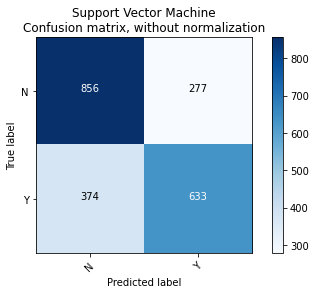

In [ ]:
# Support Vector Machine
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.25, random_state=42)
svm = SVC(random_state=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

y_score = svm.decision_function(X_test)
svm_fpr, svm_tpr, _ = roc_curve(y_test, y_score)
svm_roc_auc = auc(svm_fpr, svm_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Support Vector Machine\nConfusion matrix, without normalization')

**Single Logistic Regression 80 20 train test**

Accuracy: 71.240000%
Overall Error Rate: 28.760000%
False Positive Rate: 21.760000%
False Negative Rate: 36.280000%
Specificity: 78.240000%
Sensitivity: 63.720000%
Proportion True Positive: 73.190000%
Proportion True Negative: 69.820000%
recall: 63.720000%
precision: 73.190000%
FDR: 26.810000%
NPV: 73.190000%
FOR: 30.180000%
F1SCORE: 31.870000%


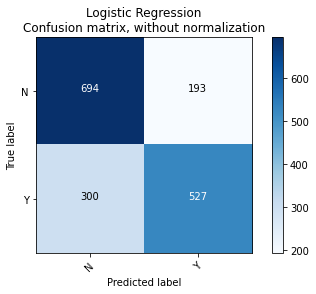

In [24]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.20, random_state=42)
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
get_descriptive_data(y_pred, y_test)

y_score = lr.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_score)
lr_roc_auc = auc(lr_fpr, lr_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression\nConfusion matrix, without normalization')

**Single K-Nearest Neighbour 70 30 trai test**

Accuracy: 65.200000%
Overall Error Rate: 34.800000%
False Positive Rate: 31.120000%
False Negative Rate: 38.910000%
Specificity: 68.880000%
Sensitivity: 61.090000%
Proportion True Positive: 63.720000%
Proportion True Negative: 66.430000%
recall: 61.090000%
precision: 63.720000%
FDR: 36.280000%
NPV: 63.720000%
FOR: 33.570000%
F1SCORE: 37.620000%


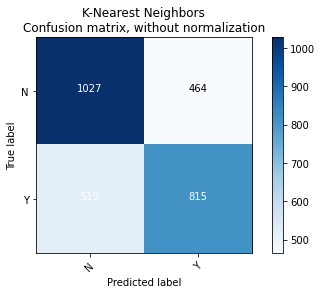

In [ ]:
# K-Nearest Neighbors
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.33, random_state=42)
knn = neighbors.KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

y_score = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_score)
knn_roc_auc = auc(knn_fpr, knn_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='K-Nearest Neighbors\nConfusion matrix, without normalization')

**Single K-Nearest Neighbour 75 25 train test**

Accuracy: 65.000000%
Overall Error Rate: 35.000000%
False Positive Rate: 31.420000%
False Negative Rate: 39.030000%
Specificity: 68.580000%
Sensitivity: 60.970000%
Proportion True Positive: 63.300000%
Proportion True Negative: 66.410000%
recall: 60.970000%
precision: 63.300000%
FDR: 36.700000%
NPV: 63.300000%
FOR: 33.590000%
F1SCORE: 37.890000%


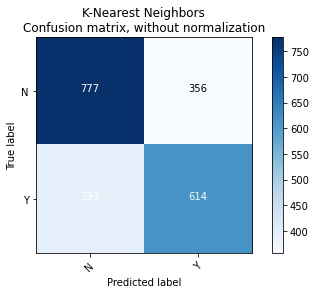

In [ ]:
# K-Nearest Neighbors
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.25, random_state=42)
knn = neighbors.KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

y_score = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_score)
knn_roc_auc = auc(knn_fpr, knn_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='K-Nearest Neighbors\nConfusion matrix, without normalization')

**Single K-Nearest Neighbour 80 20 train test**

Accuracy: 65.130000%
Overall Error Rate: 34.870000%
False Positive Rate: 32.420000%
False Negative Rate: 37.660000%
Specificity: 67.580000%
Sensitivity: 62.340000%
Proportion True Positive: 62.890000%
Proportion True Negative: 67.070000%
recall: 62.340000%
precision: 62.890000%
FDR: 37.110000%
NPV: 62.890000%
FOR: 32.930000%
F1SCORE: 37.380000%


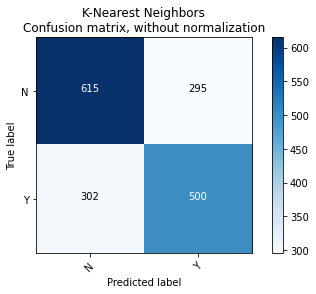

In [ ]:
# K-Nearest Neighbors
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.20, random_state=42)
knn = neighbors.KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

y_score = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_score)
knn_roc_auc = auc(knn_fpr, knn_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='K-Nearest Neighbors\nConfusion matrix, without normalization')

**Single Decision Tree 80 20 train test**

Accuracy: 65.130000%
Overall Error Rate: 34.870000%
False Positive Rate: 32.420000%
False Negative Rate: 37.660000%
Specificity: 67.580000%
Sensitivity: 62.340000%
Proportion True Positive: 62.890000%
Proportion True Negative: 67.070000%
recall: 62.340000%
precision: 62.890000%
FDR: 37.110000%
NPV: 62.890000%
FOR: 32.930000%
F1SCORE: 37.380000%


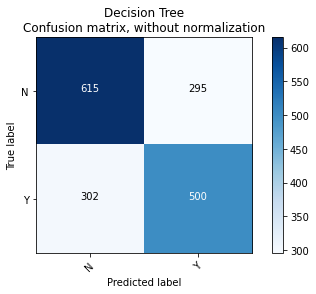

In [ ]:
# Decision Tree
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.20, random_state=42)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
y_score = dtc.predict_proba(X_test)[:, 1]
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, y_score)
dtc_roc_auc = auc(dtc_fpr, dtc_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Decision Tree\nConfusion matrix, without normalization')

**Single Naive Bayes 80 20 train test**

Accuracy: 65.130000%
Overall Error Rate: 34.870000%
False Positive Rate: 32.420000%
False Negative Rate: 37.660000%
Specificity: 67.580000%
Sensitivity: 62.340000%
Proportion True Positive: 62.890000%
Proportion True Negative: 67.070000%
recall: 62.340000%
precision: 62.890000%
FDR: 37.110000%
NPV: 62.890000%
FOR: 32.930000%
F1SCORE: 37.380000%


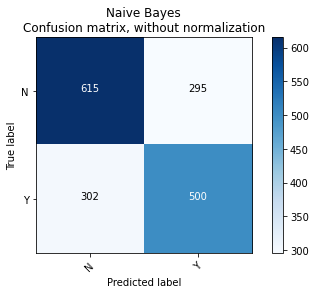

In [ ]:
# Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.20, random_state=42)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_dtc = gnb.predict(X_test)
y_score = gnb.predict_proba(X_test)[:, 1]
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, y_score)
gnb_roc_auc = auc(gnb_fpr, gnb_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Naive Bayes\nConfusion matrix, without normalization')

**Single ANN 80 20 train test**

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy: 65.130000%
Overall Error Rate: 34.870000%
False Positive Rate: 32.420000%
False Negative Rate: 37.660000%
Specificity: 67.580000%
Sensitivity: 62.340000%
Proportion True Positive: 62.890000%
Proportion True Negative: 67.070000%
recall: 62.340000%
precision: 62.890000%
FDR: 37.110000%
NPV: 62.890000%
FOR: 32.930000%
F1SCORE: 37.380000%


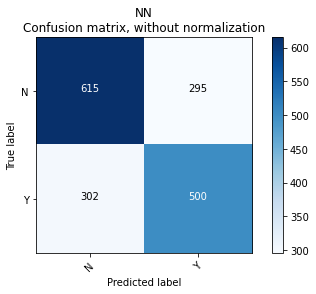

In [ ]:
# ANN
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.20, random_state=42)
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')
y_pred_dtc = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:, 1]
clf_fpr, clf_tpr, _ = roc_curve(y_test, y_score)
clf_roc_auc = auc(clf_fpr, clf_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='NN\nConfusion matrix, without normalization')

In [ ]:
# BIRCH
X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols], newdf[y_cols], test_size=0.25, random_state=42)
from sklearn.cluster import Birch
brc = Birch(branching_factor = 50, n_clusters = 3, threshold = 1.5)
brc = Birch(n_clusters=None)
brc.fit(X_train)
Birch(n_clusters=None)
brc.predict(X_train)
y_pred_brc = brc.predict(X_train)

brc_fpr, brc_tpr, _ = roc_curve(y_test, y_score)
brc_roc_auc = auc(brc_fpr, brc_tpr)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='\nBIRCH')

ValueError: ignored

In [ ]:
data = df[["PCAR_PNTS", "Tot_Spend"]]

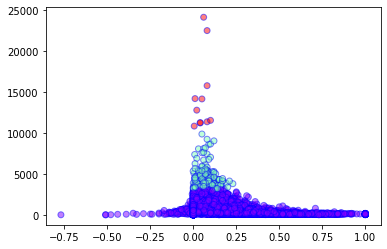

In [ ]:
from sklearn.cluster import Birch
model = Birch(branching_factor=30, n_clusters=3, threshold=2.5)
model.fit(data)
pred = model.predict(data)
plt.scatter(data["PCAR_PNTS"], data["Tot_Spend"], c=pred, cmap='rainbow', alpha=0.5, edgecolors='b')
plt.show()

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pip install imputer

ERROR: Could not find a version that satisfies the requirement imputer (from versions: none)
ERROR: No matching distribution found for imputer


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Convert the DataFrame object into NumPy array otherwise you will not be able to impute
values = df.values

# Now impute it
imputer = SimpleImputer()
imputedData = imputer.fit_transform(values)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(imputedData)

In [ ]:
X = normalizedData[:,0:117]
Y = normalizedData[:,117]

**Bagging Decision Tree**

In [ ]:
kfold = model_selection.KFold(n_splits=15, random_state=None)
dtc = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

NameError: ignored

**Adaboost Decision Tree**

In [ ]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 70
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9999652777777778


**Voting Ensemble Decision Tree**

In [ ]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)
# create the sub models
np.random.seed(1234)
estimators = []
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.9999652777777778


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

**Bagging Random Forest**

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=15, random_state=None)
rf = RandomForestClassifier()
X, Y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = BaggingClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model

results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

NameError: ignored

**Adaboost Random Forest**

In [ ]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 70
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9999652777777778


**Voting Ensemble Random Forest**

In [ ]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)
# create the sub models
estimators = []
model1 = RandomForestClassifier()
estimators.append(('random', model1))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.9999305555555555


**Bagging KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from statistics import mean
from statistics import *
# define dataset
X, Y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier(base_estimator=KNeighborsClassifier())
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

NameError: ignored

**ADABOOST KNN**

In [ ]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9999652777777778


**VOTING KNN**

In [ ]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)
# create the sub models
estimators = []
model1 = KNeighborsClassifier()
estimators.append(('random', model1))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.8687803804368801


**BAGGING LOGISTIC**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from statistics import mean
from statistics import *
# define dataset
X, Y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier(base_estimator=LogisticRegression(random_state=1),n_estimators=100,max_features=10,max_samples=100,random_state=1, n_jobs=5)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

NameError: ignored

**ADABOOST LOGISTIC**

In [ ]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

**VOTING LOGISTIC**

In [ ]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('random', model1))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

**BAGGING NAIVE BAYES**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from statistics import mean
from statistics import *
# define dataset
X, Y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier(GaussianNB(),n_estimators = 10, max_features = 0.5,random_state = 0, n_jobs = -1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

**ADABOOST NAIVE BAYES**

In [ ]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

**VOTING NAIVE BAYES**

In [ ]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)
# create the sub models
estimators = []
model1 = GaussianNB()
estimators.append(('gaussian', model1))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier 
# define dataset
from sklearn.model_selection import cross_val_score
X, Y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
model = BaggingClassifier(MLPClassifier(),n_estimators = 10, max_features = 0.5,random_state = 0, n_jobs = -1)
mlp = MLPClassifier(hidden_layer_sizes=(16, 8, 4, 2), max_iter=1001)
clf = BaggingClassifier(mlp, n_estimators=8)
clf.fit(X,Y)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')

In [ ]:
plt.figure(1, figsize=(8,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(rf_fpr, rf_tpr,color='b', label='Random Forestz ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot(gnb_fpr, gnb_tpr,color='m', label='Naive Bayes ROC curve (area = %0.2f)' % gnb_roc_auc)
plt.plot(lr_fpr, lr_tpr,color='r', label='Logistic Regression ROC curve (area = %0.2f)' % lr_roc_auc)
plt.plot(svm_fpr, svm_tpr,color='k', label='Support Vector Machine ROC curve (area = %0.2f)' % svm_roc_auc)
plt.plot(knn_fpr, knn_tpr,color='g', label='K-Nearest Neighbors ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot(dtc_fpr, dtc_tpr,color='c', label='Decision Tree ROC curve (area = %0.2f)' % dtc_roc_auc)
plt.plot(clf_fpr, clf_tpr,color='y', label='NN ROC curve (area = %0.2f)' % clf_roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('roc_curve.png')
plt.show()

In [ ]:
pip install hasy_tools

**BAGGING SVM**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
import hasy_tools  
from sklearn.datasets import make_classification


svm = LinearSVC(random_state=42)
model = BaggingClassifier(base_estimator=svm, n_estimators=31, random_state=314)
model.fit(X, Y)
X, Y = make_classification(n_samples=10000, n_features=20, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = BaggingClassifier()
# define evaluation procedure

print(results.mean())

0.9999305555555555


**ADABOOST SVM**

In [ ]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9937999999999999


**VOTING SVM**

In [ ]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)
# create the sub models
estimators = []
model1 = GaussianNB()
estimators.append(('gaussian', model1))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.9926999999999999


**NN BAGGING**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

# define dataset
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
X, Y = make_classification(n_samples=10000, n_features=20, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4
                      
clf.fit(X, Y)

print(results.mean())

SyntaxError: ignored

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pandas import DataFrame


X, Y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=2, random_state=2)
X, Y = make_classification(n_samples=10000, n_features=20, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(5, activation='softmax'))
model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# define evaluation procedure

print(results.mean())

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, LeavePOut

def KFold_test(X, y, folds, trained_model):
    n_folds    = len(folds)
    accuracies = []
    n    = X.shape[0]
    # Run K-folds
    for k in folds:
        cv     = KFold(n, n_folds=k, random_state=12, shuffle=True) if k > 0 else LeavePOut(n, p=abs(k))
        scores = cross_val_score(trained_model, X, y, cv=cv)
        accuracies.append(100 * scores.mean())
        print("K = %d, accuracy: %0.2f%%" % (k, accuracies[-1]))
    return accuracies

In [ ]:
folds      = [2, 5, 100, 200, 500, 750, 1000]
knn_accuracies = KFold_test(newdf[x_cols], newdf[y_cols], folds, knn)

NameError: ignored

In [ ]:
lr_accuracies = KFold_test(newdf[x_cols], newdf[y_cols], folds, lr)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from treeinterpreter import treeinterpreter as ti
from sklearn.datasets import load_boston
from tqdm import tqdm 
contrib_sum = np.zeros((25,2))

for i in tqdm(range(100)):
    # Random Forrest
    X_train, X_test, y_train, y_test = train_test_split(newdf[x_cols].as_matrix(), 
                                                        newdf[y_cols].as_matrix(), 
                                                        test_size=2820, 
                                                        random_state=i)
    rf = RandomForestClassifier(random_state=i, n_jobs=-1)

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    prediction, bias, contributions = ti.predict(rf, X_test)
    # contrib_sum = contributions[0]
    for i in range(contributions.shape[0]):
        contrib_sum += contributions[i]

In [ ]:
# Data Cleaning  - Remove columns which are not necessary
cols = []

for col in df.columns: 
    cols.append(col)
    
print(cols)

In [ ]:
columns_to_remove = ['Sales per Visit', 'Spending_Month_2_3', 'Spending_Month_4_5_6', 'bc purchase visits', 'ln total net sales', 'ln_ave spending per vi